# polynomial reg using PolynomialFeatures

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y=[100,60,50,60,55,60,65,70,70,70,75,76,78,90,99,99,100]
len(x)

17

In [44]:
s1=pd.Series(x , name="time")

In [45]:
s2=pd.Series(y, name="speed")
s2

0     100
1      60
2      50
3      60
4      55
5      60
6      65
7      70
8      70
9      70
10     75
11     76
12     78
13     90
14     99
15     99
16    100
Name: speed, dtype: int64

In [46]:
df=pd.DataFrame((s1,s2))

In [47]:
df = np.transpose(df)
df

,time,speed
0,1,100
1,2,60
2,3,50
3,4,60
4,5,55
5,6,60
6,7,65
7,8,70
8,9,70
9,10,70


In [48]:
df=pd.concat([s1,s2], axis=1)

In [49]:
df

,time,speed
0,1,100
1,2,60
2,3,50
3,4,60
4,5,55
5,6,60
6,7,65
7,8,70
8,9,70
9,10,70


In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
pf=PolynomialFeatures(degree=2)

In [12]:
x1 = pf.fit_transform(df[["time"]])
x2_2=x1[:,2] # here i created an list for x2 elemts to store from all rows and 2 col 
x2_1=x1[:,1]# created list for x1 , all rows and 1 col 
#This are my x1, x2 from equation Y = θ0 x0 + θ1x1 + θ2x2  

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model=LinearRegression()

In [15]:
model.fit(x1 , df.speed)

LinearRegression()

In [16]:
coef= model.coef_
coef #mean theta values θ 

array([ 0.        , -5.06953044,  0.40105779])

In [17]:
intercept= model.intercept_
intercept

78.63235294117646

In [18]:
y_pred=model.predict(x1) # here i use prdict method to predict value 
y_predicted= intercept + coef[1]*x2_1+ coef[2]*x2_2 # here i use equation
# that works behind the prdict method and pass x and theta values

In [19]:
y_predicted , y_pred # both values are sames 

(array([ 73.96388029,  70.09752322,  67.03328173,  64.77115583,
         63.31114551,  62.65325077,  62.79747162,  63.74380805,
         65.49226006,  68.04282766,  71.39551084,  75.5503096 ,
         80.50722394,  86.26625387,  92.82739938, 100.19066047,
        108.35603715]),
 array([ 73.96388029,  70.09752322,  67.03328173,  64.77115583,
         63.31114551,  62.65325077,  62.79747162,  63.74380805,
         65.49226006,  68.04282766,  71.39551084,  75.5503096 ,
         80.50722394,  86.26625387,  92.82739938, 100.19066047,
        108.35603715]))

In [20]:
line=np.linspace(1,17)
line # to plot graph we use line space for range of input 

array([ 1.        ,  1.32653061,  1.65306122,  1.97959184,  2.30612245,
        2.63265306,  2.95918367,  3.28571429,  3.6122449 ,  3.93877551,
        4.26530612,  4.59183673,  4.91836735,  5.24489796,  5.57142857,
        5.89795918,  6.2244898 ,  6.55102041,  6.87755102,  7.20408163,
        7.53061224,  7.85714286,  8.18367347,  8.51020408,  8.83673469,
        9.16326531,  9.48979592,  9.81632653, 10.14285714, 10.46938776,
       10.79591837, 11.12244898, 11.44897959, 11.7755102 , 12.10204082,
       12.42857143, 12.75510204, 13.08163265, 13.40816327, 13.73469388,
       14.06122449, 14.3877551 , 14.71428571, 15.04081633, 15.36734694,
       15.69387755, 16.02040816, 16.34693878, 16.67346939, 17.        ])

In [21]:
y_predicted= intercept + coef[1]*line + coef[2]*line**2 # to get points to plot in graph
y_predicted

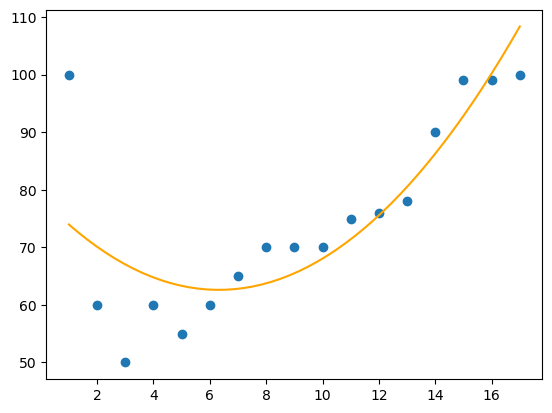

In [22]:
plt.scatter(df["time"] , df["speed"])
plt.plot(line, y_predicted , color="orange")
plt.show()

In [23]:
model.score(x1, df["speed"])

0.6941870811317734